Import necessary python libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import sys
from sklearn.model_selection import train_test_split
!{sys.executable} -m pip install altair vega_datasets
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
from ipywidgets import FloatProgress
from ipywidgets import IntProgress
!pip install ipython-autotime
!pip install ipywidgets --user
pd.options.display.min_rows = 115
%load_ext autotime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 686 µs (started: 2023-03-20 21:58:00 +00:00)


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive
time: 16 s (started: 2023-03-20 21:59:25 +00:00)


In [ ]:
%cd /content/drive/MyDrive/Big_Data_Assignment/Airbnb

/content/drive/MyDrive/Big_Data_Assignment/Airbnb
time: 6.82 ms (started: 2023-03-20 21:59:43 +00:00)


Load the Airbnb NYC dataset

In [ ]:
AB_NYC = pd.read_csv('/content/drive/MyDrive/Big_Data_Assignment/Airbnb/Airbnb_NYC.csv')

time: 2.8 s (started: 2023-03-20 21:59:46 +00:00)


<ipython-input-4-106a4752fd89>:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  AB_NYC = pd.read_csv('/content/drive/MyDrive/Big_Data_Assignment/Airbnb/Airbnb_NYC.csv')


To find missing values in dataset

In [ ]:
pd.DataFrame(AB_NYC.isna().sum().sort_values(ascending = False))

,0
bathrooms,41533
calendar_updated,41533
license,41532
host_about,18312
neighborhood_overview,17444
neighbourhood,17443
host_response_time,13645
host_response_rate,13645
host_acceptance_rate,12211
review_scores_value,9848


time: 218 ms (started: 2023-03-20 21:59:55 +00:00)


Dsitribution of host_response_time using the bar graph

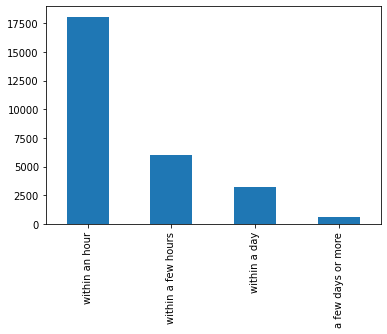

time: 256 ms (started: 2023-03-20 21:59:59 +00:00)


In [ ]:
#Data Cleanup - Replacing missing values with most frequency
AB_NYC['host_response_time'].isna().sum()
AB_NYC['host_response_time'].value_counts().plot(kind = 'bar')
#AB_NYC['host_response_time'] = AB_NYC['host_response_time'].fillna('within an hour')
AB_NYC['host_response_time'].fillna('within an hour', inplace=True)

From the above graph, we know that the most of the data is towards the  "within an hour". So we replace all the NA values with it.

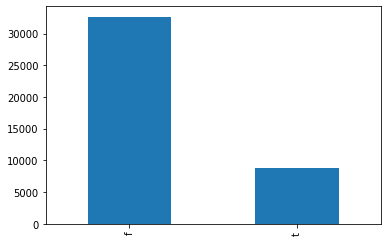

time: 488 ms (started: 2023-03-20 22:00:01 +00:00)


In [ ]:
#Data Cleanup - Replacing missing values with most frequency
AB_NYC['host_is_superhost'].isna().sum()
AB_NYC['host_is_superhost'].value_counts().plot(kind = 'bar')
#AB_NYC['host_is_superhost'] = AB_NYC['host_is_superhost'].fillna('f')
AB_NYC['host_is_superhost'].fillna('f', inplace=True)

From the above graph, we know that the most of the data is towards the  "f". So we replace all the NA values with it.

In [ ]:
def calculate_missing_values(df):
    missing_df = 100 * df.isna().sum() / len(df.index)
    missing_df = missing_df.to_frame()
    missing_df = missing_df[missing_df[0] != 0]
    missing_df.plot.bar(figsize=(20,20))
    return missing_df

calculate_missing_values(AB_NYC)

In [ ]:
#Replace Blanks with NaN
#AB_NYC = AB_NYC.replace({'':np.nan})
#AB_NYC = AB_NYC.replace({'':np.nan_to_num(AB_NYC)})
#def CalMissing(df):
#    MissingDF = 100*AB_NYC.isna().sum()/len(AB_NYC.index)
#    MissingDF = MissingDF.to_frame()
#    MissingDF = MissingDF[MissingDF[0] != 0]
#    MissingDF.plot.bar(figsize=(20,20))
#    return MissingDF
#X = CalMissing(AB_NYC)

Remove dollar sign for all variables with '$' sign

In [ ]:
#Data Cleanup - Removing special characters\
AB_NYC['host_response_rate']=AB_NYC['host_response_rate'].str.replace('[%]','')
AB_NYC['host_acceptance_rate']=AB_NYC['host_acceptance_rate'].str.replace('[%]','')
AB_NYC['price'] = AB_NYC['price'].replace('[$,,]', '', regex=True)
AB_NYC['host_response_rate'].apply(lambda x: float(x))
AB_NYC['host_acceptance_rate'].apply(lambda x: float(x))
AB_NYC['price'].apply(lambda x: float(x))

We are now using the interquartile range to remove the outliers , we chose interquartile because we wanted to get the most observed data which doesnot have misconfigured values

In [ ]:
#Remove Price Outlier
percentile25 = AB_NYC['price'].astype('float').quantile(0.25)
percentile75 = AB_NYC['price'].astype('float').quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
AB_NYC = AB_NYC[AB_NYC['price'].astype('float') < upper_limit]

(38311, 75)

time: 169 ms (started: 2023-03-20 22:00:14 +00:00)


In [ ]:
from pandas.io.formats.style import Subset
#Drop rows and columns that has missing values and redundant in any of the subset columns
AB_NYC = AB_NYC.dropna(how = 'any',
                       subset=['host_is_superhost', 'host_listings_count', 'neighbourhood','beds','host_location','reviews_per_month'])
# Drop columns that has only URL
AB_NYC=AB_NYC.loc[:, ~AB_NYC.columns.str.contains("url")]
#Drop columns that has more than 55% missing values 
AB_NYC = AB_NYC.drop(AB_NYC.loc[:,list((100*(AB_NYC.isnull().sum()/len(AB_NYC))>=55))].columns, 1)
#Drop redundant columns
AB_NYC=AB_NYC.drop(['name','host_name','host_id','host_is_superhost','host_identity_verified','neighbourhood','host_neighbourhood', 'first_review','last_review','calendar_last_scraped','last_scraped','scrape_id','id','host_has_profile_pic','latitude','longitude'], axis = 1)

time: 190 ms (started: 2023-03-20 22:00:18 +00:00)


<ipython-input-12-344de025f54e>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  AB_NYC = AB_NYC.drop(AB_NYC.loc[:,list((100*(AB_NYC.isnull().sum()/len(AB_NYC))>=55))].columns, 1)


Transforming boolean values to numerical

In [ ]:
#Mapping columns with Boolean True/False to 1/0
AB_NYC['has_availability'] = AB_NYC['has_availability'].map({'t':1 ,'f':0}) 
AB_NYC['instant_bookable'] = AB_NYC['instant_bookable'].map({'t':1 ,'f':0}) 

time: 21.9 ms (started: 2023-03-20 22:00:24 +00:00)


There are different types of rooms and we found that usually the type of room is more important attribute to determine the house that we choose to live in. So we tried to understand the statictsics based on the room type

In [ ]:
pd.DataFrame(AB_NYC.groupby(['room_type']).count())

,source,description,neighborhood_overview,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,9366,9342,9366,9366,9366,6644,9366,6359,6827,9366,...,9290,9294,9290,9290,9366,9366,9366,9366,9366,9366
Hotel room,38,38,38,38,38,31,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
Private room,6360,6346,6359,6360,6360,4609,6360,4049,4311,6360,...,6285,6286,6283,6283,6360,6360,6360,6360,6360,6360
Shared room,180,180,180,180,180,136,180,104,109,180,...,178,178,178,178,180,180,180,180,180,180


time: 71 ms (started: 2023-03-20 22:00:32 +00:00)


In [ ]:
report = ProfileReport(AB_NYC, title = 'Airbnb Pricing',explorative=True)

time: 11.5 ms (started: 2023-03-20 22:00:44 +00:00)


In [ ]:
report.to_file('Project_report.html')

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
time: 343 ms (started: 2023-03-20 22:01:02 +00:00)


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(AB_NYC.columns)

Index(['source', 'description', 'neighborhood_overview', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication'

Distribution of price using a histogram and we can see it is left skewed

<Axes: >

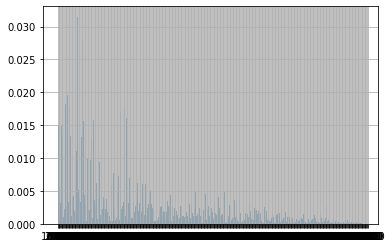

time: 3.54 s (started: 2023-03-20 22:01:09 +00:00)


In [ ]:
%matplotlib inline
AB_NYC.price.hist(bins=(np.arange(start=0, stop=400)), density=True)

In [ ]:
AB_NYC.neighbourhood_cleansed.unique()

array(['Midtown', 'Upper West Side', 'East Harlem', 'Fort Greene',
       'Williamsburg', "Hell's Kitchen", 'South Slope', 'East Village',
       'Bedford-Stuyvesant', 'Long Island City', 'West Village',
       'East Flatbush', 'Clinton Hill', 'Lower East Side', 'Chelsea',
       'Eastchester', 'Prospect Heights', 'Washington Heights', 'Harlem',
       'Sunnyside', 'Park Slope', 'Upper East Side', 'Gowanus',
       'Rockaway Beach', 'Greenpoint', 'Ditmars Steinway',
       'Middle Village', 'Chinatown', 'Greenwich Village',
       'Flatiron District', 'Windsor Terrace', 'Forest Hills',
       'Murray Hill', 'Crown Heights', 'Boerum Hill', 'Arrochar',
       'East New York', 'Tribeca', 'Emerson Hill', 'Bushwick',
       'Rego Park', 'Kensington', 'Astoria', 'Shore Acres', 'Woodside',
       'Kips Bay', 'Ridgewood', 'Allerton', 'Prospect-Lefferts Gardens',
       'Elmhurst', 'Kingsbridge', 'Gramercy', 'Theater District',
       'Richmond Hill', 'Little Italy', 'Brighton Beach', 'Sunset P

time: 8.09 ms (started: 2023-03-20 22:01:14 +00:00)


We converted the host_response_rate to normalize it by dividing it by 100

In [ ]:
AB_NYC['host_response_rate'] = AB_NYC['host_response_rate'].astype('float') / 100.0

time: 67.3 ms (started: 2023-03-20 22:01:17 +00:00)


In [ ]:
AB_NYC.shape

(15944, 51)

time: 2.92 ms (started: 2023-03-20 22:01:20 +00:00)


array([[<Axes: xlabel='beds', ylabel='beds'>,
        <Axes: xlabel='number_of_reviews', ylabel='beds'>,
        <Axes: xlabel='accommodates', ylabel='beds'>,
        <Axes: xlabel='review_scores_rating', ylabel='beds'>],
       [<Axes: xlabel='beds', ylabel='number_of_reviews'>,
        <Axes: xlabel='number_of_reviews', ylabel='number_of_reviews'>,
        <Axes: xlabel='accommodates', ylabel='number_of_reviews'>,
        <Axes: xlabel='review_scores_rating', ylabel='number_of_reviews'>],
       [<Axes: xlabel='beds', ylabel='accommodates'>,
        <Axes: xlabel='number_of_reviews', ylabel='accommodates'>,
        <Axes: xlabel='accommodates', ylabel='accommodates'>,
        <Axes: xlabel='review_scores_rating', ylabel='accommodates'>],
       [<Axes: xlabel='beds', ylabel='review_scores_rating'>,
        <Axes: xlabel='number_of_reviews', ylabel='review_scores_rating'>,
        <Axes: xlabel='accommodates', ylabel='review_scores_rating'>,
        <Axes: xlabel='review_scores_rating

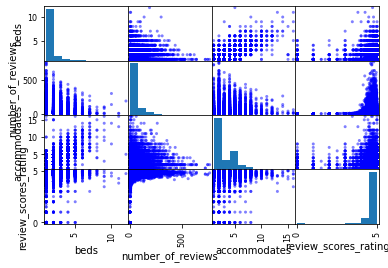

time: 2.61 s (started: 2023-03-20 22:01:21 +00:00)


In [ ]:
%matplotlib inline
plots_attr =['price','beds','number_of_reviews','accommodates','review_scores_rating']
data_scatter = AB_NYC.reindex(columns=plots_attr)
pd.plotting.scatter_matrix(data_scatter,c='blue')

We tried to find correlation between some of the attributes, and we see that beds and accomodates have a linear relation

In [ ]:
#Convert String columns to numeric
AB_NYC[['host_response_rate','price','host_acceptance_rate']] = AB_NYC[['host_response_rate','price', 'host_acceptance_rate']].apply(pd.to_numeric)
df_numeric = AB_NYC.select_dtypes(include=np.number)
for col in df_numeric.columns:
  AB_NYC[col].fillna(AB_NYC[col].mean(), inplace= True)

time: 47.4 ms (started: 2023-03-20 22:01:25 +00:00)


In [ ]:
df_numeric.isna().sum()

host_response_rate                              5394
host_acceptance_rate                            4659
host_listings_count                                0
host_total_listings_count                          0
accommodates                                       0
bedrooms                                        1404
beds                                               0
price                                              0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             0
maximum_minimum_nights                             0
minimum_maximum_nights                             0
maximum_maximum_nights                             0
minimum_nights_avg_ntm                             0
maximum_nights_avg_ntm                             0
has_availability                                   0
availability_30                                    0
availability_60                               

time: 11.5 ms (started: 2023-03-20 22:01:27 +00:00)


Convert selected strings values fromc ategorical to numerical using one hot encoding by using pandas dummies

In [ ]:
#One hot encoding by creating dummy variables for categorical column
categorical_cols = ['property_type','room_type','bed_type','cancellation_policy','host_response_time']
data_cat = AB_NYC.reindex(columns = categorical_cols)
data_dummies = pd.get_dummies(data_cat, columns = categorical_cols)
AB_NYC = pd.concat([AB_NYC, data_dummies], axis = 1)

time: 59 ms (started: 2023-03-20 22:01:30 +00:00)


We will visulaize the disribution density of different room types after converting to numeric using dummies above and the below three charts describe the distribution of the room type in the neighbourhood vs Price

Text(0.5, 1.0, 'Distribution of prices for each neighberhood_group for room_type_Entire home/apt ')

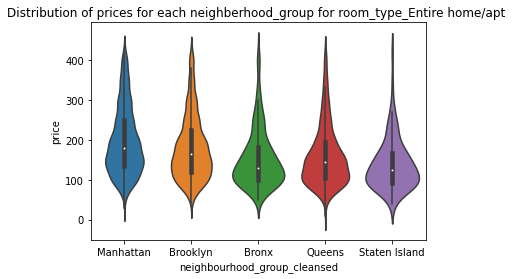

time: 434 ms (started: 2023-03-20 22:01:31 +00:00)


In [ ]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=AB_NYC[AB_NYC['room_type_Entire home/apt']==1], x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Distribution of prices for each neighberhood_group for room_type_Entire home/apt ')

Text(0.5, 1.0, 'Distribution of prices for each neighberhood_group for room_type_Hotel room')

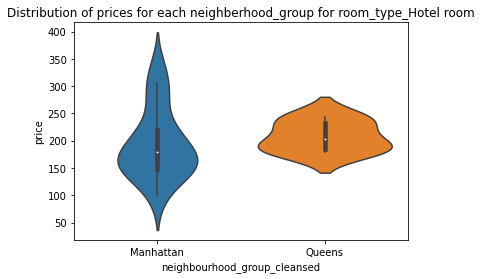

time: 331 ms (started: 2023-03-20 22:01:34 +00:00)


In [ ]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=AB_NYC[AB_NYC['room_type_Hotel room']==1], x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Distribution of prices for each neighberhood_group for room_type_Hotel room')

Text(0.5, 1.0, 'Distribution of prices for each neighbourhood_group for room_type_Private room')

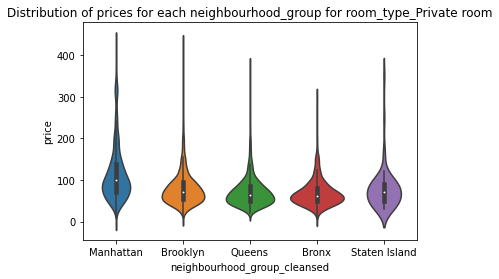

time: 391 ms (started: 2023-03-20 22:01:36 +00:00)


In [ ]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=AB_NYC[AB_NYC['room_type_Private room']==1], x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Distribution of prices for each neighbourhood_group for room_type_Private room')

Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood_group')

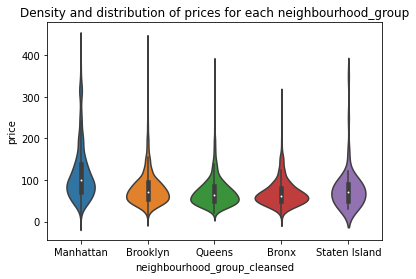

time: 592 ms (started: 2023-03-20 22:01:39 +00:00)


In [ ]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=AB_NYC[AB_NYC['room_type_Private room']==1], x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Density and distribution of prices for each neighbourhood_group')

In [ ]:
#Dropping the duplicate columns after creating dummy variables
drop_columns = ['neighbourhood_group_cleansed','property_type','room_type','host_response_time']
AB_NYC.reindex(columns=drop_columns)
AB_NYC = AB_NYC.drop(columns=drop_columns)

time: 13.4 ms (started: 2023-03-20 22:01:42 +00:00)


In [ ]:
#To separate the numeric columns in dataset
df_numeric = AB_NYC.select_dtypes(include=np.number)

time: 3.44 ms (started: 2023-03-20 22:01:45 +00:00)


In [ ]:
#To separate the string column in dataset
df_str = AB_NYC.select_dtypes(include = object)

time: 3.72 ms (started: 2023-03-20 22:01:47 +00:00)


In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15944 entries, 0 to 40760
Data columns (total 97 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   host_response_rate                                15944 non-null  float64
 1   host_acceptance_rate                              15944 non-null  float64
 2   host_listings_count                               15944 non-null  float64
 3   host_total_listings_count                         15944 non-null  float64
 4   accommodates                                      15944 non-null  int64  
 5   bedrooms                                          15944 non-null  float64
 6   beds                                              15944 non-null  float64
 7   price                                             15944 non-null  float64
 8   minimum_nights                                    15944 non-null  int64  
 9   maximum_nights   

In [ ]:
df_numeric = df_numeric.sample(frac=0.2, replace=True, random_state=1)

time: 7.45 ms (started: 2023-03-20 22:01:52 +00:00)


Splitting the data into traning(80%) and testing(20%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_numeric.drop(columns = 'price',axis=1),df_numeric.price, 
                                                    test_size = 0.2,
                                                   random_state = 123)

time: 8.79 ms (started: 2023-03-20 22:01:54 +00:00)


Scaling the data so that the variance is 1 and mean becomes 0

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 19.2 ms (started: 2023-03-20 22:01:56 +00:00)


We will perform PCA so that we will retain 90% variance and this is help us to get the most coreralted features and hence redeuce the number of features to tbe trained for our final model

In [ ]:
np.any(np.isnan(X_train))


False

time: 6.16 ms (started: 2023-03-20 22:02:00 +00:00)


In [ ]:
#Selection features that exlain atleast 90% of the target variance
from sklearn.decomposition import PCA
pca = PCA(0.90)
pca.fit(X_train_scaled)

PCA(n_components=0.9)

time: 167 ms (started: 2023-03-20 22:02:01 +00:00)


In [ ]:
pca.n_components_

43

time: 5.38 ms (started: 2023-03-20 22:02:04 +00:00)


In [ ]:
X_train  = pca.transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)

time: 15.7 ms (started: 2023-03-20 22:02:06 +00:00)


Text(0, 0.5, 'cumulative explained variance')

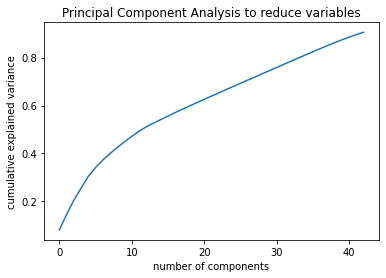

time: 363 ms (started: 2023-03-20 22:02:08 +00:00)


In [ ]:
#this is to perform PCA on our data 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Principal Component Analysis to reduce variables')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.metrics import *
from sklearn import ensemble
from sklearn import linear_model
from sklearn import metrics

time: 110 ms (started: 2023-03-20 22:02:22 +00:00)


We will now model multiple regression models, the below are the models we are trying to use

In [ ]:
models = {'Linear': LinearRegression(),
          'Logistic': LogisticRegression(),
          'Ridge':Ridge(),
          'Lasso':Lasso(), 
          'ElasticNet': ElasticNet(),
          'Linear svr' : LinearSVR(),
          'GBR': ensemble.GradientBoostingRegressor(),
          'GBR tuned':ensemble.GradientBoostingRegressor(learning_rate=0.01, loss='absolute_error', max_depth=4,min_samples_split=2,n_estimators=500),
          'Linear SVR': SVR(C= 10, epsilon= 0.3, gamma= 0.001, kernel= 'rbf')
         }

time: 1.58 ms (started: 2023-03-20 22:02:26 +00:00)


In [ ]:
results_dict = {}
for model_name, model in models.items(): 
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    tr_mae = median_absolute_error(y_train, y_train_pred)
    valid_mae = median_absolute_error(y_test, y_test_pred)
    train_rmse = mean_squared_error(y_train,y_train_pred)**0.5
    valid_rmse = mean_squared_error(y_test,y_test_pred)**0.5
    #train_r2 = r2_score(y_train,y_train_pred)
    results_dict[model_name] = [round(tr_mae,3), round(valid_mae,3), round(train_rmse,3), round(valid_rmse,3)]
    

results_df = pd.DataFrame(results_dict).T
results_df.columns = ["Train MAE", "Validation MAE","Train RMSE", "Valid RMSE"]
results_df

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Train MAE,Validation MAE,Train RMSE,Valid RMSE
Linear,34.580,33.666,62.646,60.164
Logistic,25.000,32.000,67.761,70.509
Ridge,34.584,33.667,62.646,60.164
Lasso,35.085,34.397,62.901,60.399
ElasticNet,36.669,36.625,63.457,61.191
Linear svr,30.076,30.456,65.172,63.658
GBR,26.561,31.912,48.322,57.519
GBR tuned,22.555,29.079,57.555,61.216
Linear SVR,30.711,31.912,68.444,67.040


time: 43.2 s (started: 2023-03-20 22:02:28 +00:00)


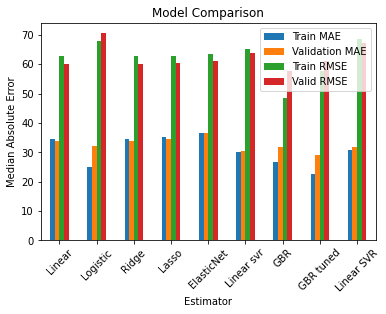

<Figure size 1080x1080 with 0 Axes>

time: 494 ms (started: 2023-03-20 22:03:18 +00:00)


In [ ]:
results_df.plot.bar(rot=45, title="Model Comparison",xlabel='Estimator',ylabel='Median Absolute Error');
plt.figure(figsize=(15,15))
plt.show();

Looking at the graph we can say most of the models being able to predict the price with a median error around  between 25 to 35 dollars

We have hypertuned the SVR and it has given us to use the below values (C= 10, epsilon= 0.3, gamma= 0.001, kernel= 'rbf')

In [ ]:
model = SVR(C= 10, epsilon= 0.3, gamma= 0.001, kernel= 'rbf')
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
tr_mae = median_absolute_error(y_train, y_train_pred)
valid_mae = median_absolute_error(y_test, y_test_pred)
train_rmse = mean_squared_error(y_train,y_train_pred)**0.5
valid_rmse = mean_squared_error(y_test,y_test_pred)**0.5        
results_dict['SVR hypertuned'] = [round(tr_mae,3), round(valid_mae,3), round(train_rmse,3), round(valid_rmse,3)]
    
results_df = pd.DataFrame(results_dict).T
results_df.columns = ["Train MAE", "Validation MAE","Train RMSE","Validation RMSE"]
results_df

,Train MAE,Validation MAE,Train RMSE,Validation RMSE
Linear,34.580,33.666,62.646,60.164
Logistic,25.000,32.000,67.761,70.509
Ridge,34.584,33.667,62.646,60.164
Lasso,35.085,34.397,62.901,60.399
ElasticNet,36.669,36.625,63.457,61.191
Linear svr,30.076,30.456,65.172,63.658
GBR,26.561,31.912,48.322,57.519
GBR tuned,22.555,29.079,57.555,61.216
Linear SVR,30.711,31.912,68.444,67.040
SVR hypertuned,30.711,31.912,68.444,67.040


time: 1.15 s (started: 2023-03-20 22:03:23 +00:00)
